# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kalemie
Processing Record 2 of Set 1 | callao
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | san antonio del estrecho
City not found. Skipping...
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | tsiombe
Processing Record 11 of Set 1 | cumnock
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | taguatinga
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | coahuayana de hidalgo
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | ribeira g

Processing Record 41 of Set 4 | boa vista
Processing Record 42 of Set 4 | el gouna
Processing Record 43 of Set 4 | kasimov
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | lancaster
Processing Record 46 of Set 4 | kirensk
Processing Record 47 of Set 4 | namibe
Processing Record 48 of Set 4 | xuddur
Processing Record 49 of Set 4 | calvi
Processing Record 0 of Set 5 | zahedan
Processing Record 1 of Set 5 | san jose village
City not found. Skipping...
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | dhidhdhoo
Processing Record 4 of Set 5 | machico
Processing Record 5 of Set 5 | bodo
Processing Record 6 of Set 5 | amarkantak
Processing Record 7 of Set 5 | shasta lake
Processing Record 8 of Set 5 | olonkinbyen
Processing Record 9 of Set 5 | umm kaddadah
Processing Record 10 of Set 5 | kiunga
Processing Record 11 of Set 5 | tomatlan
Processing Record 12 of Set 5 | tazovsky
Processing Record 13 of Set 5 | polyarnyy
Processing Record 14 of Set 5 | shim

Processing Record 35 of Set 8 | ambodifotatra
Processing Record 36 of Set 8 | axim
Processing Record 37 of Set 8 | igarka
Processing Record 38 of Set 8 | volkhov
Processing Record 39 of Set 8 | menongue
Processing Record 40 of Set 8 | acajutla
Processing Record 41 of Set 8 | isiro
Processing Record 42 of Set 8 | mar del plata
Processing Record 43 of Set 8 | kargat
Processing Record 44 of Set 8 | kushk
Processing Record 45 of Set 8 | enewetak
Processing Record 46 of Set 8 | batticaloa
Processing Record 47 of Set 8 | alamos
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | codrington
Processing Record 0 of Set 9 | muradnagar
Processing Record 1 of Set 9 | san fernando de apure
Processing Record 2 of Set 9 | nelson bay
Processing Record 3 of Set 9 | reggane
Processing Record 4 of Set 9 | somerton
Processing Record 5 of Set 9 | mukalla
Processing Record 6 of Set 9 | palmer
Processing Record 7 of Set 9 | sarh
Processing Record 8 of Set 9 | touros
Processing Record 9 

Processing Record 22 of Set 12 | puerto baquerizo moreno
Processing Record 23 of Set 12 | dehui
Processing Record 24 of Set 12 | cedeira
Processing Record 25 of Set 12 | malango
Processing Record 26 of Set 12 | cajati
Processing Record 27 of Set 12 | acapulco de juarez
Processing Record 28 of Set 12 | campbell river
Processing Record 29 of Set 12 | zaozersk
Processing Record 30 of Set 12 | darwin
Processing Record 31 of Set 12 | margate
Processing Record 32 of Set 12 | peterhead
Processing Record 33 of Set 12 | pitmoaga
Processing Record 34 of Set 12 | den burg
Processing Record 35 of Set 12 | midelt
Processing Record 36 of Set 12 | tavda
Processing Record 37 of Set 12 | zabaykal'sk
Processing Record 38 of Set 12 | namtsy
Processing Record 39 of Set 12 | santa marta
Processing Record 40 of Set 12 | walvis bay
Processing Record 41 of Set 12 | zouerate
Processing Record 42 of Set 12 | victorica
Processing Record 43 of Set 12 | khorixas
Processing Record 44 of Set 12 | tadmur
Processing R

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kalemie,-5.9475,29.1947,77.97,46,23,13.78,CD,1690094841
1,callao,-12.0667,-77.1500,70.09,73,100,5.75,PE,1690094842
2,bethel,41.3712,-73.4140,67.50,85,0,3.44,US,1690094843
3,qaqortoq,60.7167,-46.0333,53.19,73,100,4.94,GL,1690094843
4,grytviken,-54.2811,-36.5092,24.08,79,59,11.01,GS,1690094845


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kalemie,-5.9475,29.1947,77.97,46,23,13.78,CD,1690094841
1,callao,-12.0667,-77.1500,70.09,73,100,5.75,PE,1690094842
2,bethel,41.3712,-73.4140,67.50,85,0,3.44,US,1690094843
3,qaqortoq,60.7167,-46.0333,53.19,73,100,4.94,GL,1690094843
4,grytviken,-54.2811,-36.5092,24.08,79,59,11.01,GS,1690094845


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

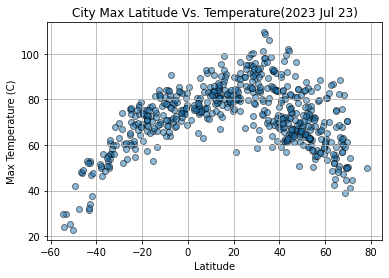

In [33]:
# Extract relevant fields from the city_data data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(%s)" % time.strftime("%Y %b %d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

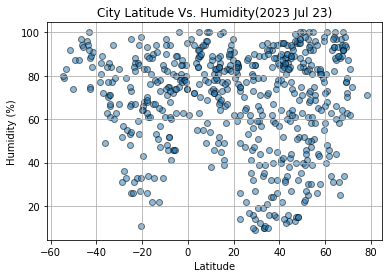

In [36]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%Y %b %d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

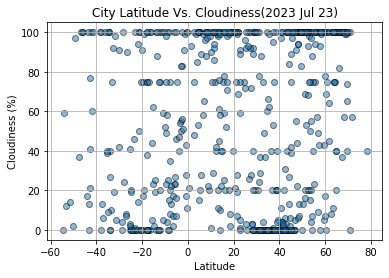

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%Y %b %d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

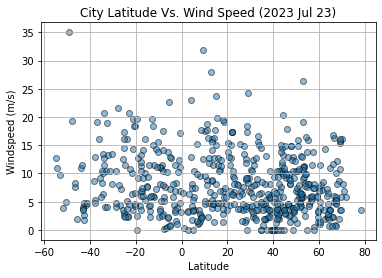

In [41]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.5, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%Y %b %d"))
plt.ylabel("Windspeed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [91]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(0,50), fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue:.3f}")
    plt.show()

In [92]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,67.50,85,0,3.44,US,1690094843
3,qaqortoq,60.7167,-46.0333,53.19,73,100,4.94,GL,1690094843
5,anadyr,64.7500,177.4833,54.10,87,40,11.01,RU,1690094845
6,thompson,55.7435,-97.8558,53.76,71,75,4.61,CA,1690094846
9,cumnock,55.4544,-4.2664,55.00,96,100,15.97,GB,1690094848


In [93]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kalemie,-5.9475,29.1947,77.97,46,23,13.78,CD,1690094841
1,callao,-12.0667,-77.1500,70.09,73,100,5.75,PE,1690094842
4,grytviken,-54.2811,-36.5092,24.08,79,59,11.01,GS,1690094845
7,edinburgh of the seven seas,-37.0676,-12.3116,55.87,72,6,19.15,SH,1690094846
8,tsiombe,-25.3000,45.4833,75.74,53,0,3.00,MG,1690094847


###  Temperature vs. Latitude Linear Regression Plot
#### Linear regression scatter plot for Northern Hemisphere: Temperature (C) vs. Latitude

The r-squared is: -0.551


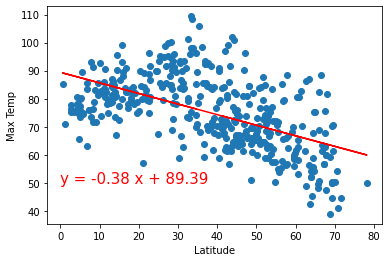

In [117]:
## Linear regression scatter plot for Northern Hemisphere: Temperature (C) vs. Latitude
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp',(10,50))

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Plot
# plt.scatter(x_values,y_values)
# plt.plot(x_values, regress_values, "r-")
# plt.annotate(line_eq,(0,50), fontsize=15, color="red")
# plt.xlabel("Latitude")
# plt.ylabel("Max Temp")
# print(f"The r-squared is: {rvalue:.3f}")
# plt.show()

#### Linear regression scatter plot for Southern Hemisphere: Temperature (C) vs. Latitude

The r-squared is: 0.849


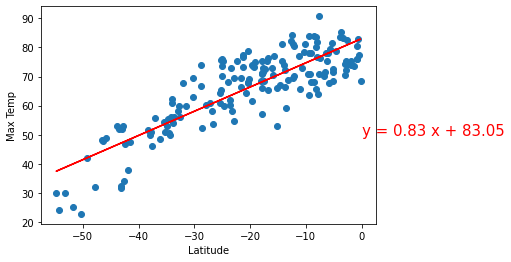

In [118]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

#### Linear regression scatter plot for Northern Hemisphere: Humidity (%) vs. Latitude

The r-squared is: -0.035


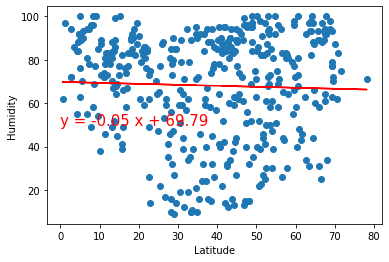

In [119]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (30,50))

#### Linear regression scatter plot for Southern Hemisphere: Humidity (%) vs. Latitude

The r-squared is: -0.139


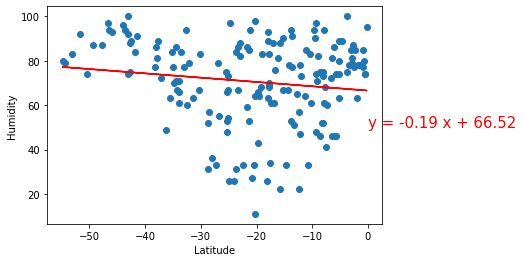

In [120]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-20,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

#### Linear regression scatter plot for Northern Hemisphere: Cloudiness (%) vs. Latitude

The r-squared is: 0.030


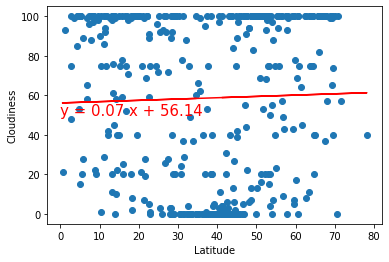

In [121]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (60,50))

#### Linear regression scatter plot for Southern Hemisphere: Cloudiness (%) vs. Latitude

The r-squared is: 0.020


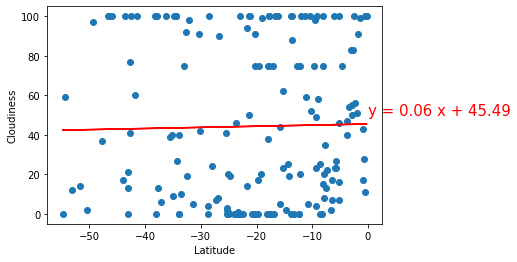

In [122]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness',(-3,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

#### Linear regression scatter plot for Northern Hemisphere: Wind Speed (m/s) vs. Latitude

The r-squared is: -0.123


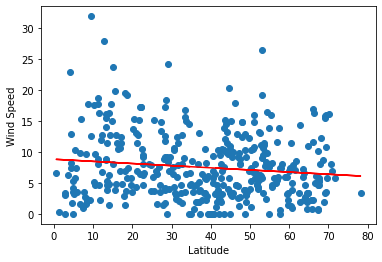

In [123]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,70))

The r-squared is: -0.123


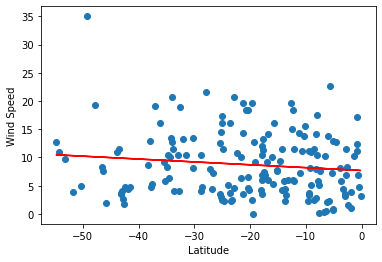

In [124]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-6,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE